### Customer Segmentation - Mall Customers

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
# Removing Customer ID, since it plays no role in clustering
df.drop('CustomerID', axis=1, inplace=True)

### Let's have a look at the distribution of our features

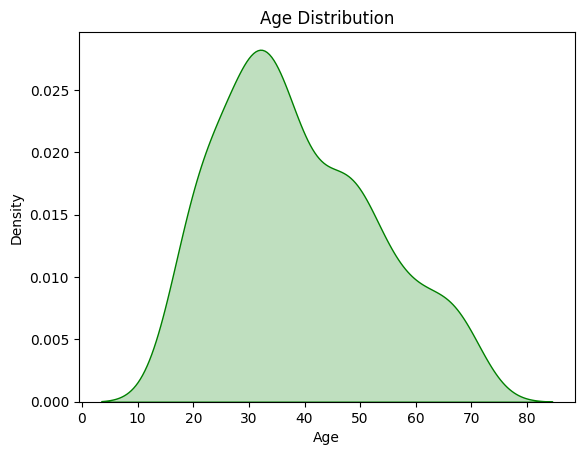

In [5]:
# Let's have a look at the distribution of our features
sns.kdeplot(df['Age'], color="green",fill=True)
plt.title('Age Distribution')
plt.show()

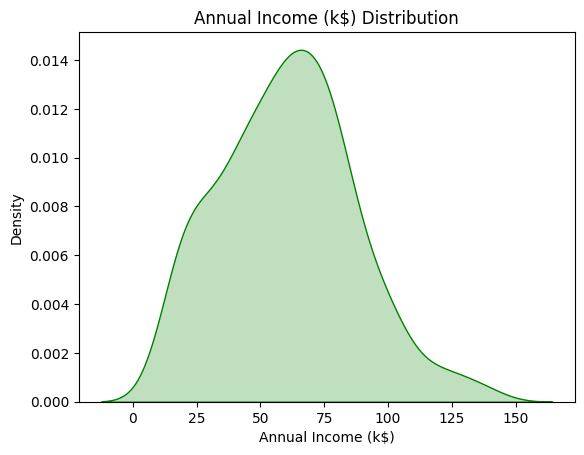

In [6]:
sns.kdeplot(df['Annual Income (k$)'], color="green",fill=True)
plt.title('Annual Income (k$) Distribution')
plt.show()

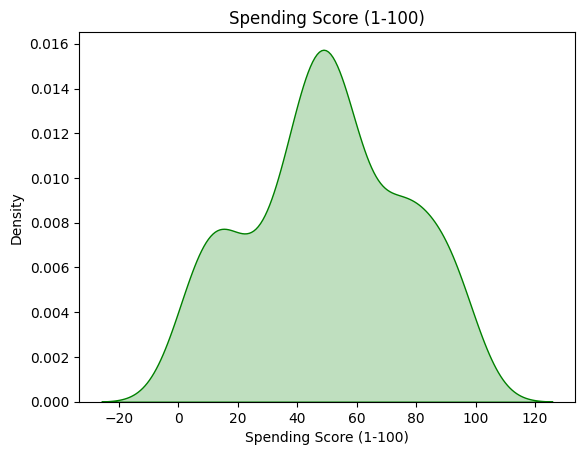

In [7]:
sns.kdeplot(df['Spending Score (1-100)'], color="green",fill=True)
plt.title('Spending Score (1-100)')
plt.show()

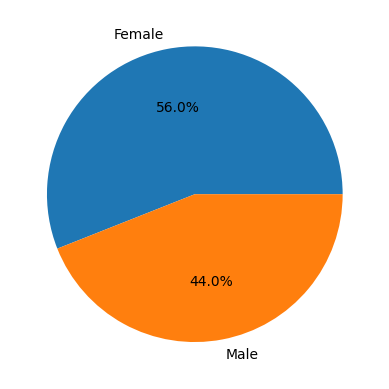

In [8]:
gender_count = df['Gender'].value_counts(normalize=True)

plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')
plt.show()

#### We see a normal distribution for our num features and almost a 50/50 split between genders

In [9]:
columns = ['Spending Score (1-100)','Annual Income (k$)', 'Age']

for column in columns:
    mean = df[column].mean()
    print(f'Average {column}: {mean}')
    

Average Spending Score (1-100): 50.2
Average Annual Income (k$): 60.56
Average Age: 38.85


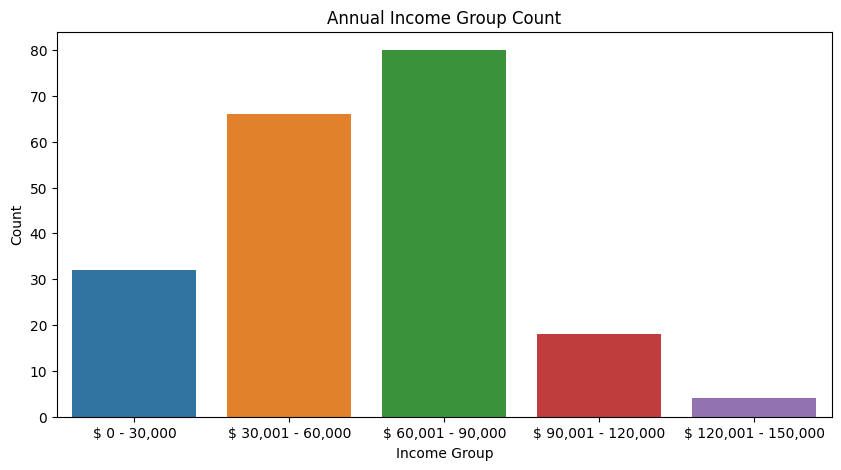

In [10]:
income30 = df[(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
income60 = df[(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
income90 = df[(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
income120 = df[(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
income150 = df[(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

incomeX = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
incomeY = [len(income30.values), len(income60.values), len(income90.values), len(income120.values), len(income150.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=incomeX, y=incomeY)
plt.title('Annual Income Group Count')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

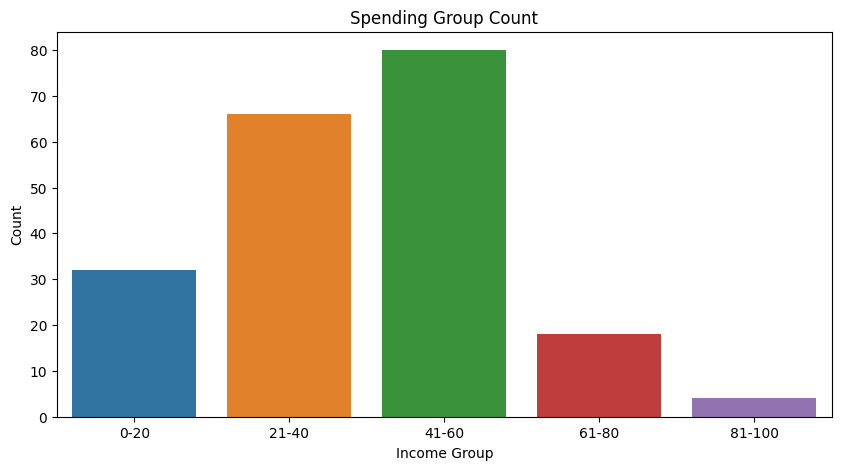

In [11]:
spent20 = df[(df['Spending Score (1-100)'] >= 0) & (df['Spending Score (1-100)'] <= 20)]
spent40 = df[(df['Spending Score (1-100)'] >= 21) & (df['Spending Score (1-100)'] <= 40)]
spent60 = df[(df['Spending Score (1-100)'] >= 41) & (df['Spending Score (1-100)'] <= 60)]
spent80 = df[(df['Spending Score (1-100)'] >= 61) & (df['Spending Score (1-100)'] <= 80)]
spent100 = df[(df['Spending Score (1-100)'] >= 811) & (df['Spending Score (1-100)'] <= 100)]

incomeX = ["0-20", "21-40", "41-60", "61-80", "81-100"]
incomeY = [len(income30.values), len(income60.values), len(income90.values), len(income120.values), len(income150.values)]

plt.figure(figsize=(10,5))
sns.barplot(x=incomeX, y=incomeY)
plt.title('Spending Group Count')
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.show()

#### So far, we know the majority of our customers are between 25-35 and most customers have an income of 60k-90k with a spending score of 41-60

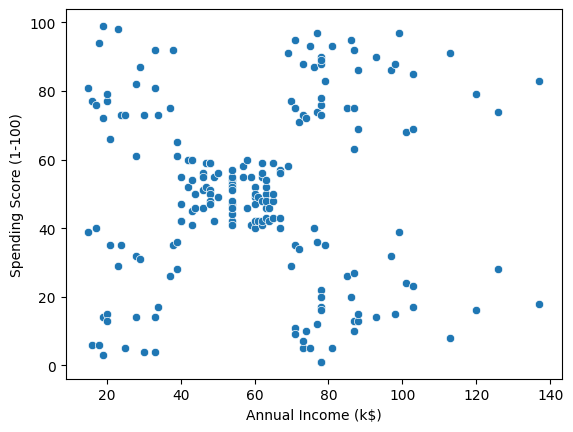

In [12]:
sns.scatterplot(x= df['Annual Income (k$)'], y=df['Spending Score (1-100)'])
plt.show()

## K-Means clustering and Elbow Method

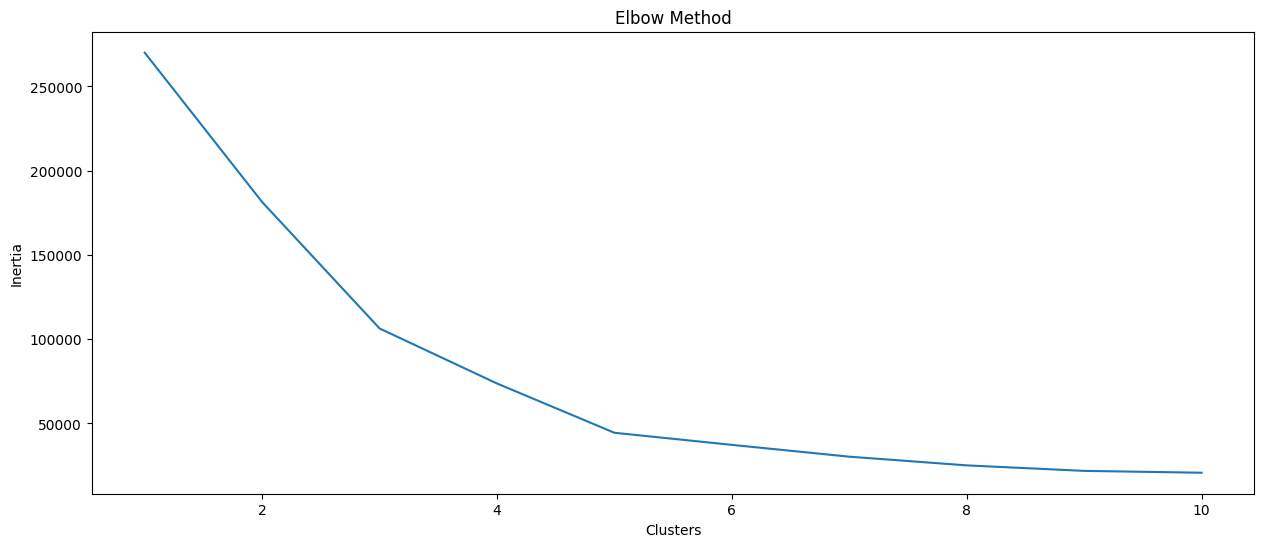

In [13]:
inertia = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(df.iloc[:, [2, 3]].values)
    inertia.append(km.inertia_)

plt.figure(figsize=(15,6))  
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.show()

##### By looking at the graph, we can see the "elbow" is around 5 clusters. After 5 clusters the inertia is flattening out and we have found our centroids. 

In [14]:
# Defining x
x = df[['Spending Score (1-100)', 'Annual Income (k$)']].values

In [15]:
# Fitting the model
km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

#### Now we add the clusters to our dataframe

In [16]:
df['Clusters'] = y_means

In [18]:
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,Male,19,15,39,4
1,Male,21,15,81,3
2,Female,20,16,6,4
3,Female,23,16,77,3
4,Female,31,17,40,4


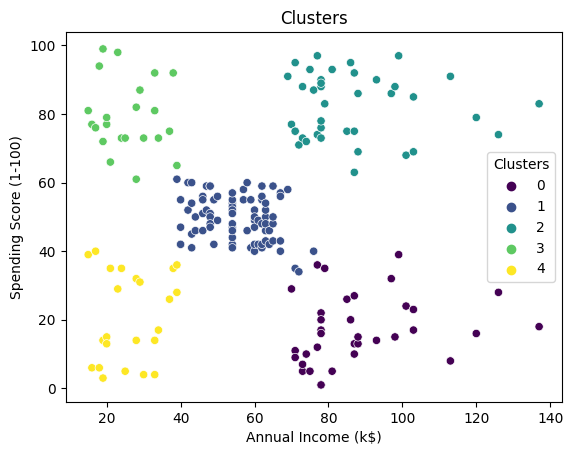

In [22]:
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"], palette='viridis', hue=df['Clusters'])
plt.title('Clusters')
plt.show()

##### We have 5 clusters or segments:

###### 0.) High income & low spending
###### 1.) Average income, average spending
###### 2.) High income & high spending
###### 3.) Low income & high spending
###### 4.) Low income & low spending

#### Let's have a look at values per segment

In [24]:
# Average age
df.groupby('Clusters')['Age'].mean()

Clusters
0    41.114286
1    42.716049
2    32.692308
3    25.272727
4    45.217391
Name: Age, dtype: float64

##### Low income, high spending segment is the youngest followed by high income, high spending

In [26]:
# Let's look at the gender distribution
df.groupby('Clusters')['Gender'].value_counts(normalize=True)

Clusters  Gender
0         Male      0.542857
          Female    0.457143
1         Female    0.592593
          Male      0.407407
2         Female    0.538462
          Male      0.461538
3         Female    0.590909
          Male      0.409091
4         Female    0.608696
          Male      0.391304
Name: proportion, dtype: float64